In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
sales = pd.read_csv('Salesdata.csv')
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


### 1. Compare Sales by region for 2016 with 2015 using bar chart

<Axes: title={'center': 'Sales Comparison between 2015 and 2016'}, xlabel='Region', ylabel='Total Sales'>

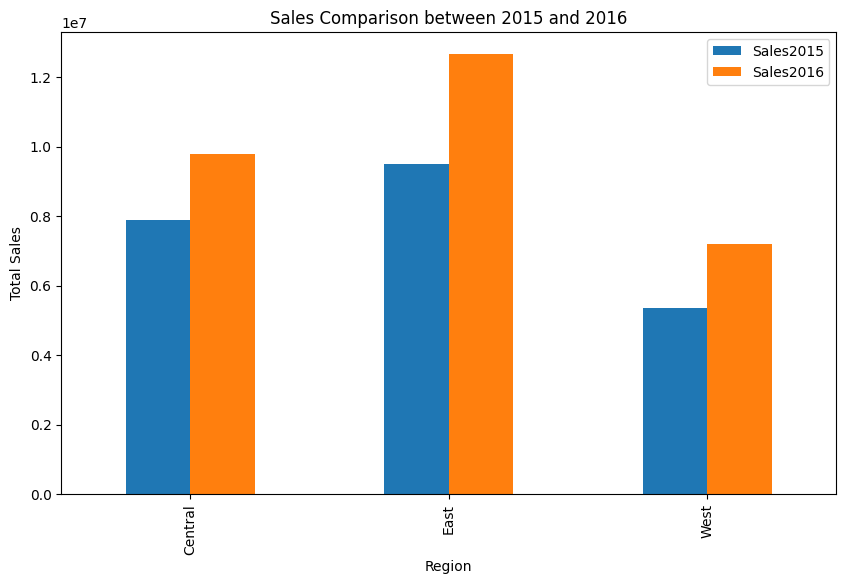

In [15]:
sales.groupby('Region').aggregate({'Sales2015': 'sum', 'Sales2016': 'sum'}).plot.bar(figsize=(10, 6), ylabel='Total Sales', 
                                                        xlabel='Region', title='Sales Comparison between 2015 and 2016', legend=True)


### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

Text(0.5, 1.0, 'Pie Chart of Sales 2016')

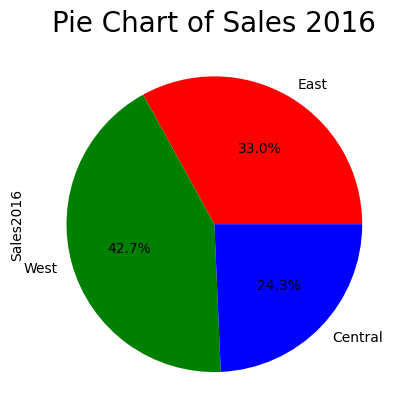

In [16]:
sales.groupby('Region').sum()['Sales2016'].plot(kind='pie', labels=['East', 'West', 'Central'], colors=['r', 'g', 'b'], 
                                                autopct='%.1f%%', fontsize=10).set_title('Pie Chart of Sales 2016', fontsize=20)


### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

C:\Users\lenovo\AppData\Local\Temp\ipykernel_29296\1840532050.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  sales.groupby(['Region', 'Tier']).aggregate({'Sales2015': 'sum', 'Sales2016': 'sum'}).plot.bar(figsize=(15, 6)).legend().figure.show()


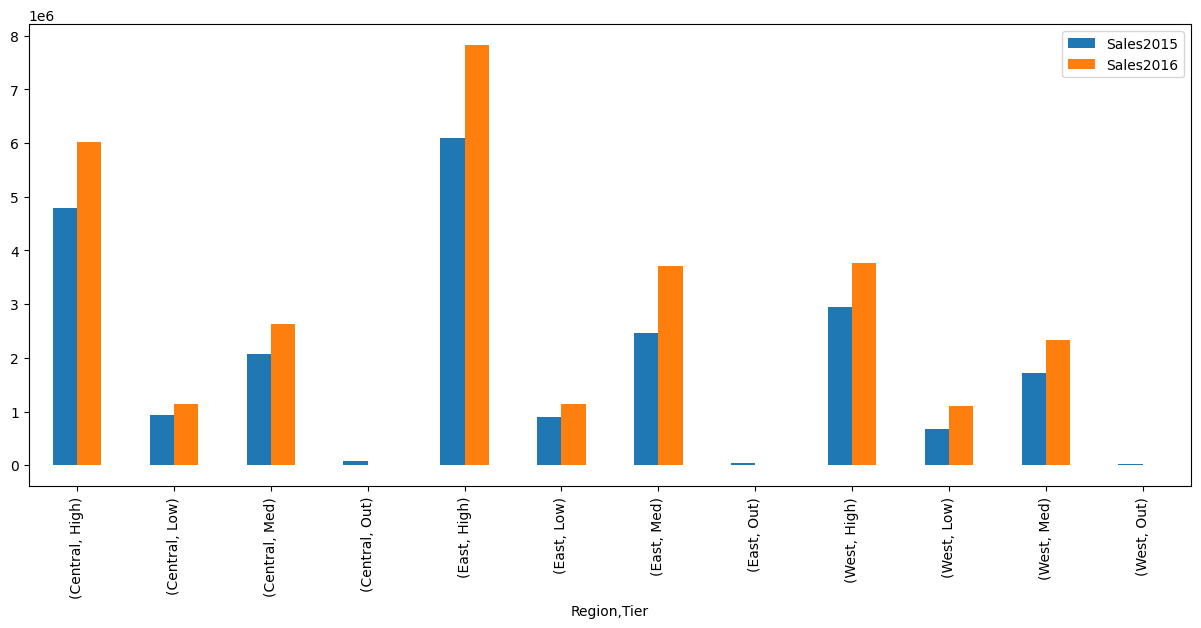

In [17]:
sales.groupby(['Region', 'Tier']).aggregate({'Sales2015': 'sum', 'Sales2016': 'sum'}).plot.bar(figsize=(15, 6)).legend().figure.show()


### 4. In East region, which state registered a decline in 2016 as compared to 2015?


<Axes: xlabel='State'>

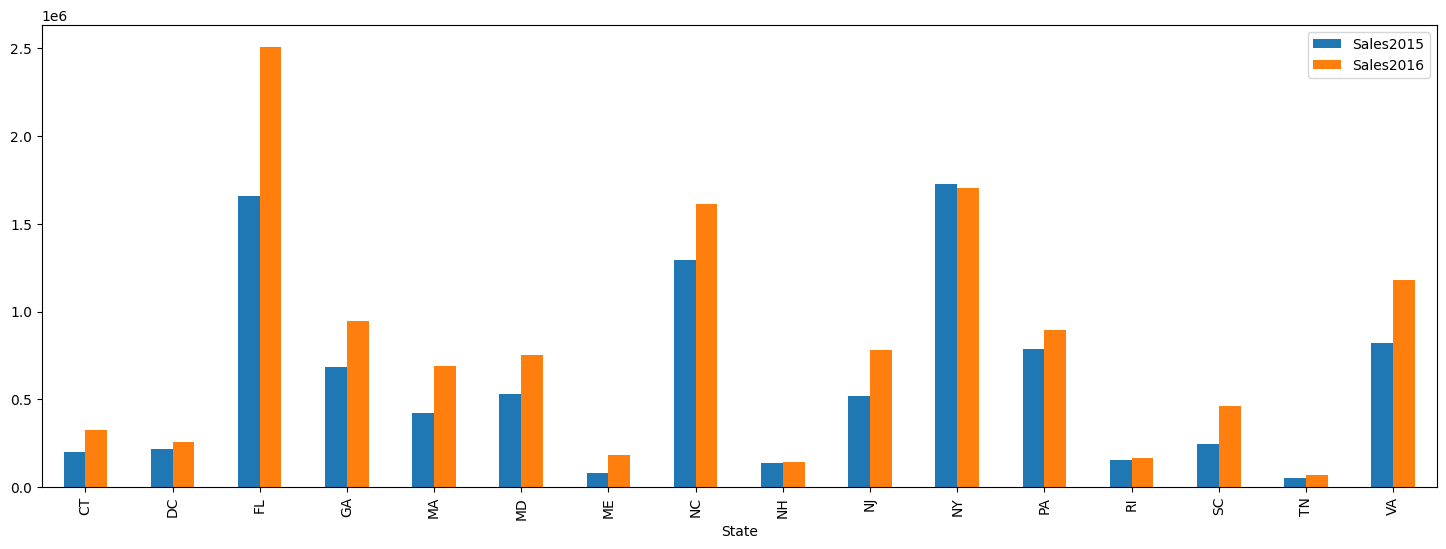

In [18]:
sales.loc[sales.Region == 'East'].groupby('State').agg({'Sales2015': 'sum', 'Sales2016': 'sum'}).plot.bar(figsize=(18, 6))


### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?


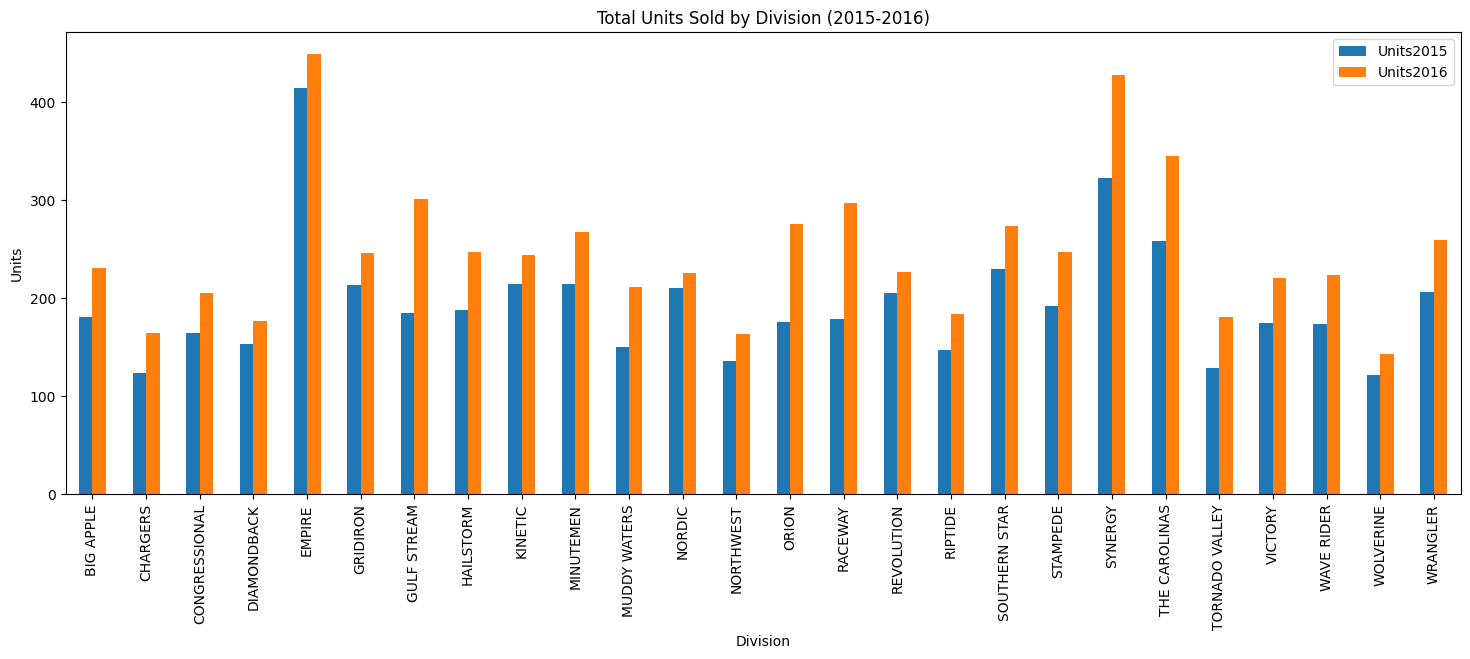

In [19]:
sales4graph = sales.loc[sales.Tier == 'High'].groupby('Division').sum()[['Units2015', 'Units2016']].plot(kind='bar', 
                                                                            figsize=(18, 6), title='Total Units Sold by Division (2015-2016)')
plt.legend()
plt.ylabel('Units')
plt.show()


### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -

• Jan - Mar : Q1

• Apr - Jun : Q2

• Jul - Sep : Q3

• Oct - Dec : Q4

In [20]:
sales['Qtr'] = np.select([sales['Month'].isin(['Jan', 'Feb', 'Mar']),
                          sales['Month'].isin(['Apr', 'May', 'Jun']),
                          sales['Month'].isin(['Jul', 'Aug', 'Sep']),
                          sales['Month'].isin(['Oct', 'Nov', 'Dec'])],
                         ['Q1', 'Q2', 'Q3', 'Q4'])
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

Text(0.5, 1.0, 'Sales Comparison by Quarter')

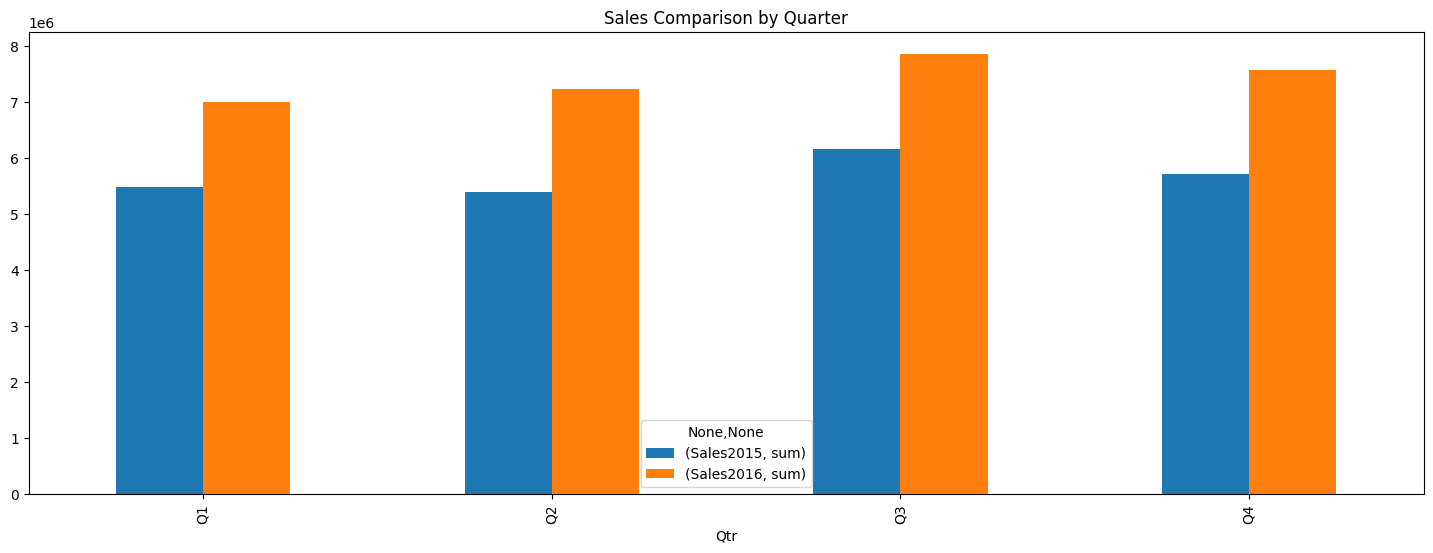

In [21]:
sales.groupby(['Qtr']).aggregate({'Sales2015':['sum'],'Sales2016':['sum']}).plot.bar(figsize=(18,6)).set_title('Sales Comparison by Quarter')


### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
 (Draw 4 pie charts representing a Quarter for each Tier)

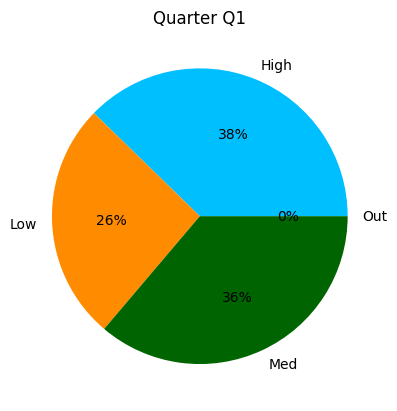

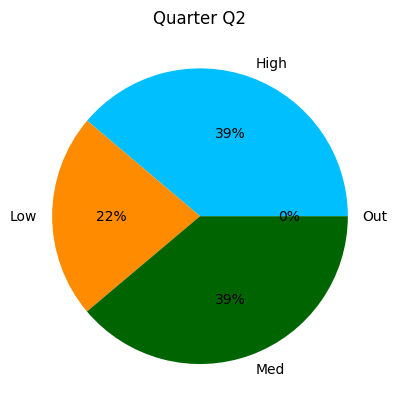

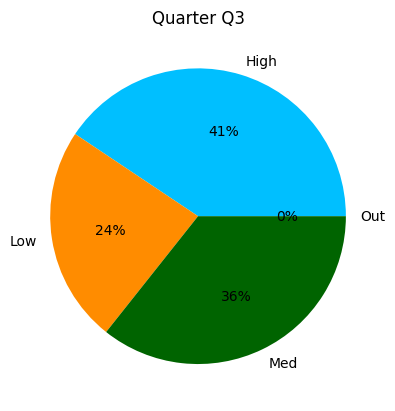

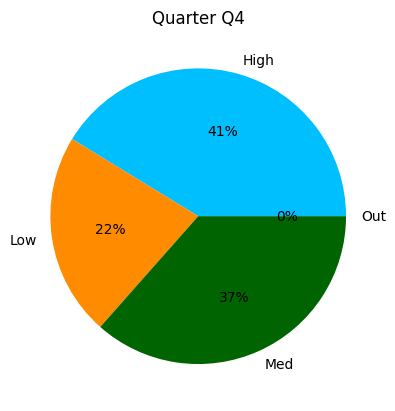

In [38]:
qtr_pivot = sales.pivot_table(index='Qtr', columns='Tier', values='Sales2016')

labels = ["High", "Low", "Med", "Out"]
colors = ['deepskyblue', 'darkorange', 'darkgreen', 'red']

# Loop over each quarter to create the pie charts
for qtr in ['Q1', 'Q2', 'Q3', 'Q4']:
    # Ensure non-negative values for Q3
    data = qtr_pivot.loc[qtr, :].clip(lower=0) if qtr == 'Q3' else qtr_pivot.loc[qtr, :]
    
    plt.pie(x=data, autopct="%1.0f%%", labels=labels, colors=colors)
    plt.title(f'Quarter {qtr}')
    plt.show()
